This notebook develops code to simulate and visualize a 2D Ising model.

In [1]:
# Import some pacakges that we will use
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('default')

# Store three different types of configurations as a demonstration

# down_Config will be a configuration with every spin equalling -1
# up_Config will be a configuration with every spin equally +1
# random_Config will be a configuration with every spin randomly set equal to
# either +1 or -1

L = 20; # Length of the 2d grid

# Make the down_Config. Note that np.zeros(L*L) will return a vector of all 0's
# and Python is smart enough to know that subtracting the scalar 1 from the
# vector should really subtract 1 from each element of the zero vector.
down_Config = np.zeros(L*L) - 1;

# Make the up_Config based on the down_Config
up_Config = np.copy(down_Config) + 2;

# Make the random_Config. I start by copying the down_Config because it is a
# quick and easy way to make the random_Config vector be the right have the
# correct size
random_Config = np.copy(down_Config);
for i in range(L*L):
    random_Config[i] = 2 * np.random.randint(2) - 1

print('Here is a configuration of all down spins:')
print(down_Config)
print('Here is a configuration of all up spins:')
print(up_Config)
print('Here is a configuration of random spins:')
print(random_Config)

Here is a configuration of all down spins:
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1.

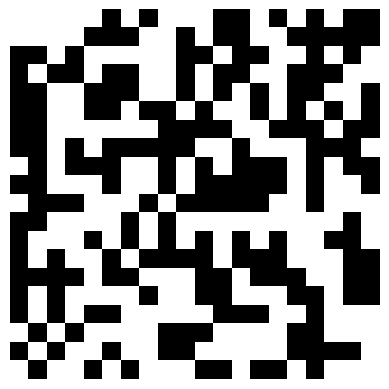

In [ ]:
# Write a function to plot the spin configuration
def plotConfig(config, L):
  # The only thing that has changed from the 1D code is that (1, L)
  # became (L, L)
  plt.imshow(np.resize((config + 1)/2, (L,L)), vmin=0, vmax=1, \
             cmap=plt.cm.Greys);
  plt.axis('off');

# Use the plotting function
plotConfig(random_Config, L)

In [3]:
# Write a function to compute the index for spin i's neighbors
def neighbors1d(i, L):
  if i==0:
    neighbor1 = L-1
  else:
    neighbor1 = i-1
  if i==L-1:
    neighbor2 = 0
  else:
    neighbor2 = i+1
  return [neighbor1, neighbor2]

# Write a function to compute the index for spin i's neighbors
def neighbors2d(i, L):
  row = int(np.floor(i / L))
  column = i - (row * L)

  [leftcol, rightcol] = neighbors1d(column, L)
  [downrow, uprow] = neighbors1d(row, L)

  upneighbor = (uprow * L) + column
  downneighbor = (downrow*L) + column
  leftneighbor = (row*L) + leftcol
  rightneighbor = (row * L) + rightcol
  return [leftneighbor, rightneighbor, upneighbor, downneighbor]

In [89]:
# Compute the contribution of spin i to the total energy
def energy1spin(i, L, h, J, config):
  energy = -h * config[i]
  for neighbor in neighbors2d(i,L):
    # Notice that we have J/2 rather than J since we will count up
    # the i-j interaction for spin i *and* for spin j.
    energy -= (J/2) * config[i]*config[neighbor]
  return energy

# Compute the total energy of a configuration
def energy(L, h, J, config):
  energy = 0
  for i in range(L*L):
    energy += energy1spin(i, L, h, J, config)
  return energy

def local_magnetization(i,L,config): 
  m = config[i]
  for neighbor in neighbors2d(i,L): m += config[neighbor]
  return m/5

In [800]:
# This is the main Monte Carlo loop!
m_expectation = []
bias = []
progress = 0
m_ = []

for m_0 in (np.linspace(0,1,100)*-1): 
  # Start with a random configuration
  if progress == 0: 
    config = np.copy(random_Config)
  # Set up the hamiltonian you want to sample
  J = 1
  h = 0
  beta = 0.2
  # Store the initial energy
  old_energy = energy(L, h, J, config)
  # Configurations will be added to this empty list so you can make a movie
  # of the visited configurations
  stored_configs = []
  # Perform 10**6 Monte Carlo steps
  num_mc_steps = 40000
  # Create a vector to store the values of m
  mag_values = np.zeros(num_mc_steps)
  mag_values[0]= np.sum(config)/len(config)
  # Loop over the Monte Carlo steps
  for mcstep in range(num_mc_steps):

    index_for_spin_flip = np.random.randint(L**2)
    # Compute the old contribution to the energy from spin i
    old_energy = energy1spin(index_for_spin_flip, L, h, J, config)
    # Compute old local magnetization per site 
    m_old = np.sum(config)/len(config)
    # Flip that spin
    ### FILL THIS IN ###
    config[index_for_spin_flip] = config[index_for_spin_flip]*-1
    # Compute spin i's contribution to energy for the new configuration
    new_energy = energy1spin(index_for_spin_flip,L,h,J,config)
    # Compute new local magnetization per site
    m_new = np.sum(config)/len(config)
    # Compute the change in energy due to the spin flip
    # Notice the factor of 2, which was needed because we have to count the way
    # flipping i changes the (J/2) factor that energy1spin attributed to spin i
    # but also the (J/2) factor that energy1spin attributed to spin j
    delta_energy = 2 * (new_energy - old_energy)

    # Calculate the probability of accepting the move
    acceptance_probability = min(1,np.exp(-beta*(delta_energy +  10000*(m_new-m_0)**2)))
    #acceptance_probability = min(1,np.exp(-beta*(10*(m_new-1)**2)))
    #bias.append([delta_energy,8*(delta_m  - 1)**2])
    # Draw a random number between 0 and 1 to determine whether or not to
    if np.random.random() < acceptance_probability:
      pass
    else: 
      config[index_for_spin_flip] = config[index_for_spin_flip]*-1
    # compute m for the configuration
    mag_values[mcstep] = np.sum(config) / len(config)
    # Store every 10 configurations. You could adjust this if you feel like you
    # have too many or too few frames
    #if (mcstep % 10 == 0):
    #  stored_configs.append(np.copy(config))

  m_.append([mag_values,m_0])
  
  
  #mu = np.mean(mag_values[20000:]) # computes simple average of the magnetization per site
  #var_0 = np.var(mag_values[20000:],ddof = 1) # computes the variance with ddof = 1; (Xi-X_bar)^2/n
  #m_expectation.append([beta,mu])
  if (progress + 1) % 20 == 0: 
    print("you are " + str((progress+1)) + " %" + " way finished!!!!"  ) 
  progress +=1


you are 20 % way finished!!!!
you are 40 % way finished!!!!
you are 60 % way finished!!!!
you are 80 % way finished!!!!
you are 100 % way finished!!!!


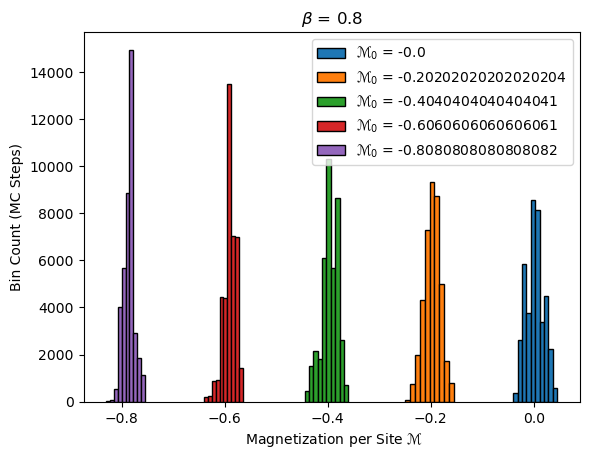

In [801]:
m_0 = np.linspace(0,1,100)
windows = [[i -0.01,i+0.01] for i in m_0]
h = []
for i in range(len(m_)):
    hist,bin_edges = np.histogram(np.array(m_[i][0]),bins = 10)
    h.append([hist,bin_edges])

fig, ax = plt.subplots()
for i in range(len(m_)):
        if i % 20 == 0:                 
                ax.hist(m_[i][0], bins = 10, edgecolor = "black", label = r"$\scrM_0$ = " + str(m_[i][1]))
#                ax.hist(m_[i][0], bins = 10, label = r"$\scrM_0$ = " + str(m_[i][1]))
                ax.set_xlabel(r" Magnetization per Site $\scrM$")
                ax.set_ylabel(r"Bin Count (MC Steps)")
                ax.set_title(r"$\beta$ = 0.8" )
                ax.legend()
        

In [799]:
# Computer numerator of Poest
p0_noweight_RHS = []
for magn in (np.linspace(0,1,100)):

    p = 0 # this is our probability. needs to reset for each magn value

    for hist_ in range(len(h)):

        if magn < min(h[hist_][1]):

            break 

        else: 

            for edges_ in range(len(h[hist_][1])):

                if edges_ < len(h[hist_][1])-1: 

                    if (magn <= h[hist_][1][edges_ + 1]) and (magn >= h[hist_][1][edges_]):
                        
                        p += h[hist_][0][edges_]/np.sum(np.array(h[hist_][0]))

                        break
    p0_noweight_RHS.append(p)

In [802]:
p0_noweight_LHS = []
for magn in (np.linspace(0,1,100)*-1):

    p = 0 # this is our probability. needs to reset for each magn value

    for hist_ in range(len(h)):

        if magn > max(h[hist_][1]):

            break 

        else: 

            for edges_ in range(len(h[hist_][1])):

                if edges_ < len(h[hist_][1])-1: 

                    if (magn <= h[hist_][1][edges_ + 1]) and (magn >= h[hist_][1][edges_]):
                        
                        p += h[hist_][0][edges_]/np.sum(np.array(h[hist_][0]))

                        break
    p0_noweight_LHS.append(p)

/tmp/ipykernel_913/2042128611.py:3: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.linspace(0,1,100)*-1, -np.log(np.array(p0_noweight_LHS)), color = "indigo", label = r"100 MC Simulations Biased - $\scrM_0$")
/tmp/ipykernel_913/2042128611.py:4: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.linspace(0,1,100), -np.log(np.array(p0_noweight_RHS)), color = "violet", label = r"100 MC Simulations Biased + $\scrM_0$")


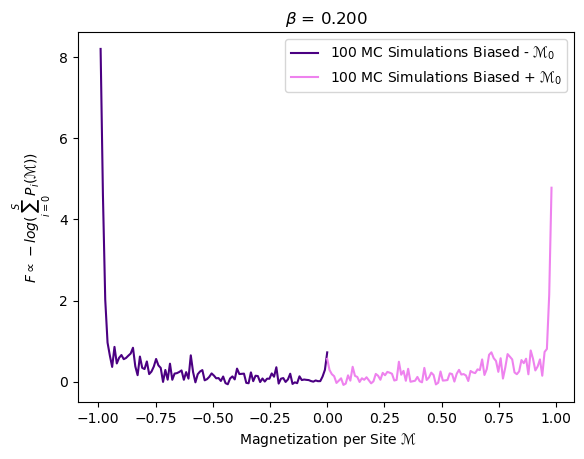

In [803]:
fig,ax = plt.subplots()

ax.plot(np.linspace(0,1,100)*-1, -np.log(np.array(p0_noweight_LHS)), color = "indigo", label = r"100 MC Simulations Biased - $\scrM_0$")
ax.plot(np.linspace(0,1,100), -np.log(np.array(p0_noweight_RHS)), color = "violet", label = r"100 MC Simulations Biased + $\scrM_0$")
ax.set_xlabel(r" Magnetization per Site $\scrM$")
ax.set_ylabel(r"$ F \propto -log(\sum_{i=0}^S P_i(\scrM))$")
ax.set_title(r"$\beta$ = 0.200" )
ax.legend()

In [662]:
def compute_A(M_i_min, M_i_1_max,edge_H_i_1,edge_H_i,H_i_1,H_i):
    s1, s2 = 0,0
    for i,j in zip(range(len(edge_H_i)),range(len(edge_H_i_1))):
        if i != len(edge_H_i) -1:  
            if (edge_H_i[i] <= M_i_1_max) and (edge_H_i[i+1] >= M_i_min):
                s1 += H_i[i]/len(H_i)
        if j != len(edge_H_i_1) -1: 
            if (edge_H_i_1[j] <= M_i_1_max) and (edge_H_i_1[j+1] >= M_i_min):
                s2 += H_i_1[j]/len(H_i_1)
    return s1 + s2 

def compute_B(M_i_1_max, M_ip1_min,edge_H_i,H_i):
    s = 0
    for i in range(len(edge_H_i)):
        if i != len(edge_H_i) -1: 
            if (edge_H_i[i] <= M_ip1_min) and (edge_H_i[i+1] >= M_i_1_max):
                s += H_i[i]/len(H_i)
    return s -1 

def compute_C(M_i_p1_min, M_i_max,edge_H_i,edge_H_i_p1,H_i,H_i_p1):
    s1,s2 = 0,0
    for i,j in zip(range(len(edge_H_i)),range(len(edge_H_i_p1))):
        if i != len(edge_H_i) - 1: 
            if (edge_H_i[i] <= M_i_p1_min) and (edge_H_i[i+1] >= M_i_max):
                s1 += H_i[i]/len(H_i)
        if j != len(edge_H_i_p1) -1:
            if (edge_H_i_p1[j] <= M_i_p1_min) and (edge_H_i_p1[j+1] >= M_i_max):
                s2 += H_i_p1[j]/len(H_i_p1)            
    return s1 + s2

def compute_Q(Q_i, Q_i_1,A_i,B_i,C_i):
    Q_i_p1 = -(Q_i*Q_i_1*A_i + (Q_i*Q_i_1 + Q_i**2)*B_i)/(Q_i_1*A_i +(Q_i_1+Q_i)*B_i +(Q_i_1 + Q_i)*C_i)
    return Q_i_p1

def compute_prob(h,) 

In [664]:
# Compute the partition functions 
Q = [1]
for i in range(len(h)):
    if i > 0 and i < len(h) -1:
        # A: M_i_min, M_i_1_max,edge_H_i_1,edge_H_i,H_i_1,H_i
        A = compute_A(windows[i][0],windows[i-1][1],h[i-1][1],h[i][1],h[i-1][0],h[i][0])
        # B : M_i_1_max, M_ip1_min,edge_H_i,H_i
        B = compute_B(windows[i-1][1],windows[i+1][0],h[i][1],h[i][0])
        # C : M_i_p1_min, M_i_max,edge_H_i,edge_H_i_p1,H_i,H_i_p1
        C = compute_C(windows[i+1][0],windows[i][1],h[i][1],h[i+1][1],h[i][0],h[i+1][0]) 
        Q_ = compute_Q(Q[i],Q[i-1],A,B,C)
        Q.append(Q_)
    else: 
        B = compute_B(windows[0][0],windows[1][0],h[0][1],h[0][0])
        C = compute_C(windows[1][0],windows[0][1],h[0][1],h[1][1],h[0][0],h[1][0])
        Q_ = compute_Q(1,0,0,B,C)
        Q.append(Q_)

/tmp/ipykernel_913/376523089.py:32: RuntimeWarning: invalid value encountered in scalar divide
  Q_i_p1 = -(Q_i*Q_i_1*A_i + (Q_i*Q_i_1 + Q_i**2)*B_i)/(Q_i_1*A_i +(Q_i_1+Q_i)*B_i +(Q_i_1 + Q_i)*C_i)


In [ ]:
x = np.linspace(0,1,100)
y = []
for i,j,k in zip(np.linspace(0,1,100),m_0,range(len(Q))):
    N = np.sum(np.exp(-beta*(10000*(i-j)**2))*(Q[0]/Q[k]))
    y.append(()/N)
    


Text(0.5, 0, 'Biasing Function Index')

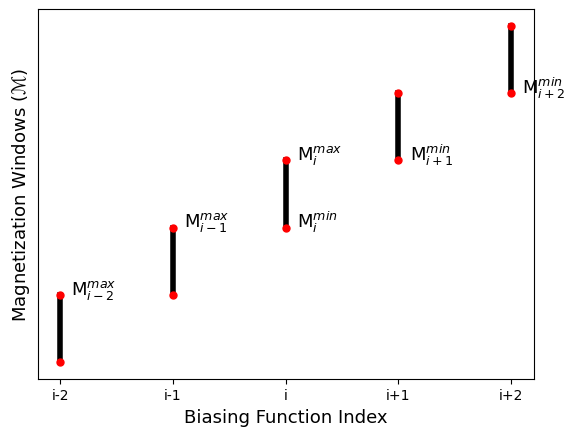

In [524]:
import matplotlib.pyplot as plt 
import numpy as np 

fig,ax = plt.subplots()
x = [i for i in range(1,6,1)]
y = []
tick_position = [i for i in range(1,6,1)]
tick_labels = ["i-2","i-1","i","i+1","i+2"]

for i in x:
    y_ = [] 
    for j in np.linspace(0,1,100): 
        y_.append(i + j + 0.1)
    y.append(y_)

for i in range(len(x)):
    x_ = [x[i]]*100
    x[i] = x_

for i in range(len(x)): 
    ax.plot(x[i],y[i], color = "black", linewidth = 4)

ax.plot([x[0][0],x[0][0]],[min(y[0]),max(y[0])],'or', markersize = 5)
ax.plot([x[1][0],x[1][0]],[min(y[1]),max(y[1])],'or', markersize = 5)
ax.plot([x[2][0],x[2][0]],[min(y[2]) ,max(y[2])],'or', markersize = 5)
ax.plot([x[3][0],x[3][0]],[min(y[3]),max(y[3])],'or', markersize = 5)
ax.plot([x[4][0],x[4][0]],[min(y[4]),max(y[4])],'or', markersize = 5)

z_i_2 = (x[0][0],max(y[0]))
z_i_1 = (x[1][0], max(y[1]))
z_i_min = (x[2][0],min(y[2]))
z_i_max = (x[2][0],max(y[2]))
z_ip1 = (x[3][0], min(y[3]))
z_ip2 = (x[4][0], min(y[4]))
ax.text(z_i_2[0] + 0.1,z_i_2[1],r"M$_{i-2}^{max}$", fontsize = 13, color = 'black')
ax.text(z_i_1[0] + 0.1,z_i_1[1],r"M$_{i-1}^{max}$", fontsize = 13, color = 'black')
ax.text(z_i_min[0] + 0.1,z_i_min[1],r"M$_{i}^{min}$", fontsize = 13, color = 'black')
ax.text(z_i_max[0] + 0.1,z_i_max[1],r"M$_{i}^{max}$", fontsize = 13, color = 'black')
ax.text(z_ip1[0] + 0.1,z_ip1[1],r"M$_{i+1}^{min}$", fontsize = 13, color = 'black')
ax.text(z_ip2[0] + 0.1,z_ip2[1],r"M$_{i+2}^{min}$", fontsize = 13, color = 'black')


ax.set_xticks(tick_position, tick_labels)
ax.set_yticks([])
ax.set_ylabel(r"Magnetization Windows ($\scrM$)", fontsize = 13)
ax.set_xlabel("Biasing Function Index",fontsize = 13)

In [746]:
# Write a function to plot the spin configuration
def plotConfig(config, L):
  # The only thing that has changed from the 1D code is that (1, L)
  # became (L, L)
  plt.imshow(np.resize((config + 1)/2, (L,L)), vmin=0, vmax=1, \
             cmap=plt.cm.Greys);
  plt.axis('off');

# Use the plotting function
plotConfig(stored_configs[10], L)

IndexError: list index out of range

Text(0.5, 1.0, '< M > vs $\\beta$')

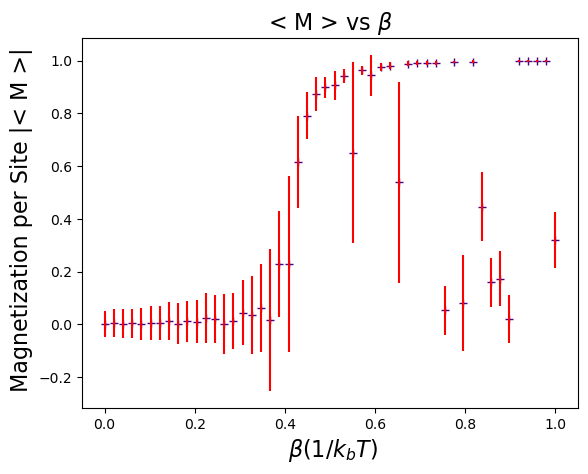

In [171]:
std_up = np.sqrt(np.array(var))

x_data = np.array(m_expectation)[:,0]
y_data = np.abs(np.array(m_expectation)[:,1])

fig,ax = plt.subplots()
ax.plot(x_data,y_data, '+', linestyle = "", color = "indigo")
ax.errorbar(x_data,y_data,yerr=std_up, linestyle = "", color = 'red')
#ax.plot(np.arange(20000,30000,100,dtype = int),f(np.arange(20000,30000,100,dtype = int),popt[0]), 'r-' )
ax.set_xlabel(r" $\beta (1/k_{b}T)$", fontsize = 16)
ax.set_ylabel(r" Magnetization per Site |< M >|", fontsize = 16)
ax.set_title(r"< M > vs $\beta$", fontsize = 16)

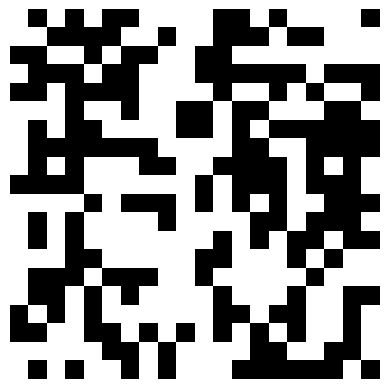

In [14]:
# Set up the animation
# This will return a static image of the final frame

from matplotlib.animation import FuncAnimation

n_Frames = len(stored_configs);

fig = plt.figure();
plt.axis('off');
img = plt.imshow(np.resize((stored_configs[0] + 1)/2, (L,L)), vmin=0, vmax=1, \
             cmap=plt.cm.Greys);

def animate(i):
  img.set_data(np.resize((stored_configs[i]+1)/2, (L,L)));
  return (img,)

anim = FuncAnimation(fig, animate, frames=n_Frames, interval=300, blit=True);